In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

/home/jinsukim/miniconda3/envs/research-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv")
df.head()

,Unnamed: 0,\q95,time,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_EDGE16:EDGE16_NE,\TS_EDGE17:EDGE17_NE,shot
0,0,9.503320,0.15,-97237.617188,1.021017,-0.001387,0.017653,-0.863323,-0.248114,14.589464,...,1.149400e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
1,1,9.745522,0.20,-123203.875000,1.064507,-0.023950,0.042690,-0.465635,-0.017974,12.083524,...,1.287133e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
2,2,9.987725,0.25,-149170.156250,1.107996,-0.046512,0.067726,-0.067947,0.212166,9.577585,...,1.389168e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
3,3,10.229928,0.30,-175136.406250,1.151485,-0.069075,0.092763,0.329740,0.442306,7.071646,...,1.494251e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074
4,4,10.472131,0.35,-201102.687500,1.194974,-0.091638,0.117800,0.727428,0.672446,4.565707,...,1.766279e+19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,13074


In [3]:
shot_list = np.unique(df.shot.values).tolist()
shot = shot_list[-100]
df_shot = df[df.shot == shot]

In [4]:
df_shot

,Unnamed: 0,\q95,time,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\TS_EDGE9:EDGE9_NE,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_EDGE16:EDGE16_NE,\TS_EDGE17:EDGE17_NE,shot
137560,2197,622.626648,0.360000,-217551.093750,1.101307,0.020508,0.020508,0.989680,0.909285,0.417497,...,6.268559e+17,4.325701e+17,0.0,0.0,2.686741e+17,NaN,NaN,NaN,NaN,21231
137561,2198,482.355713,0.410000,-240739.546875,1.131800,0.039247,0.039247,0.964488,0.927428,0.442281,...,3.441471e+17,2.591170e+17,0.0,0.0,1.014380e+19,NaN,NaN,NaN,NaN,21231
137562,2199,342.084869,0.460000,-263928.000000,1.162293,0.057985,0.057985,0.939295,0.945570,0.467065,...,1.941061e+17,4.311611e+17,0.0,0.0,1.305075e+19,NaN,NaN,NaN,NaN,21231
137563,2200,201.813980,0.510000,-287116.437500,1.192786,0.076724,0.076724,0.914102,0.963713,0.491848,...,4.043010e+17,1.179193e+17,0.0,0.0,1.629494e+19,NaN,NaN,NaN,NaN,21231
137564,2201,61.543068,0.560000,-310304.875000,1.223279,0.095463,0.095463,0.888910,0.981856,0.516632,...,1.155697e+18,6.981225e+16,0.0,0.0,1.950370e+18,NaN,NaN,NaN,NaN,21231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137712,2349,5.716003,7.959998,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231
137713,2350,5.716003,8.009997,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231
137714,2351,5.716003,8.059998,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231
137715,2352,5.716003,8.109997,-483839.093750,2.039504,0.693356,0.188766,1.047032,1.052390,1.073518,...,7.143154e+17,6.174477e+17,0.0,0.0,7.846299e+17,NaN,NaN,NaN,NaN,21231


In [5]:
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv', encoding = "euc-kr")
video_shot_list = np.unique(kstar_shot_list.shot.values).tolist()

In [6]:
kstar_shot_list

tTQend = kstar_shot_list[kstar_shot_list.shot == shot].tTQend.values
tftsrt = kstar_shot_list[kstar_shot_list.shot == shot].tftsrt.values
tipminf = kstar_shot_list[kstar_shot_list.shot == shot].tipminf.values

In [7]:
print("numerical variables : ", len(shot_list))
print("video shot list : ", len(video_shot_list))

numerical variables :  969
video shot list :  1096


In [8]:
df_shot = df_shot.dropna(axis = 1)

In [9]:
t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

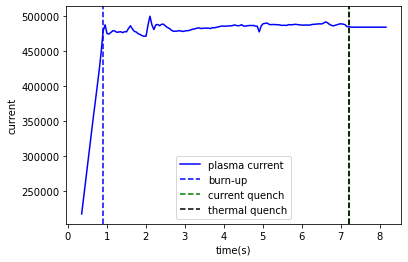

In [10]:
import matplotlib.pyplot as plt

plt.plot(t, -ip, 'b', label = 'plasma current')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('current')
plt.legend()
plt.show()

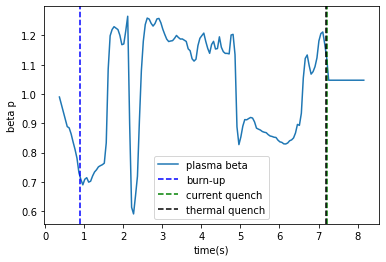

In [11]:
import matplotlib.pyplot as plt

plt.plot(t, betap, label = 'plasma beta')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

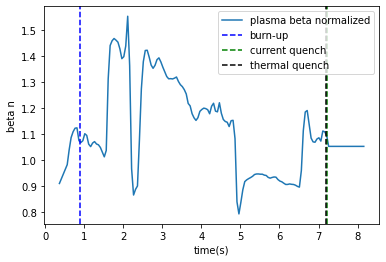

In [12]:
plt.plot(t, betan, label = 'plasma beta normalized')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta n')
plt.legend()
plt.show()

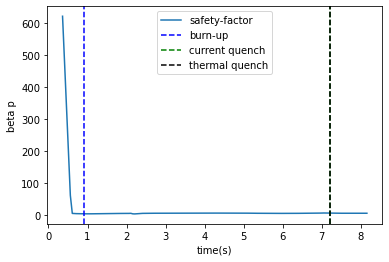

In [13]:
plt.plot(t, q95, label = 'safety-factor')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

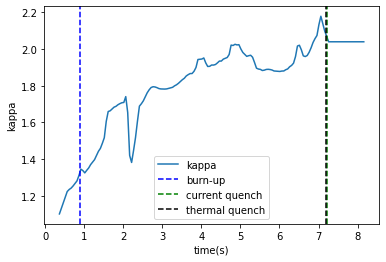

In [14]:
plt.plot(t, kappa, label = 'kappa')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('kappa')
plt.legend()
plt.show()

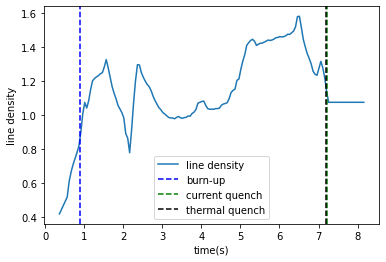

In [15]:
plt.plot(t, li, label = 'line density')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('line density')
plt.legend()
plt.show()

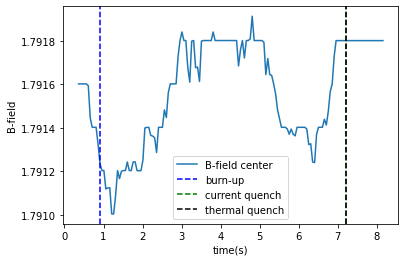

In [16]:
plt.plot(t, -Bc, label = 'B-field center')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('B-field')
plt.legend()
plt.show()

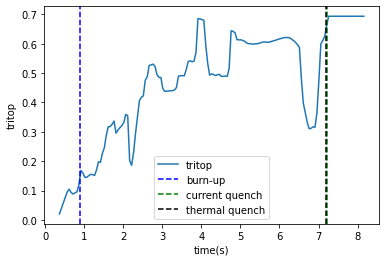

In [17]:
plt.plot(t, tritop, label = 'tritop')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tritop')
plt.legend()
plt.show()

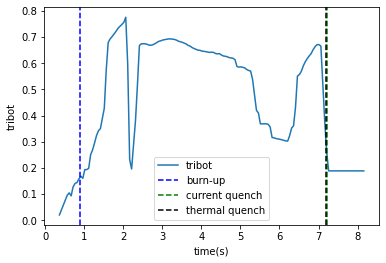

In [18]:
plt.plot(t, tribot, label = 'tribot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tribot')
plt.legend()
plt.show()

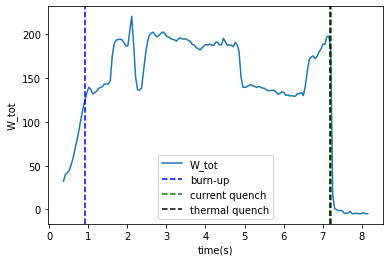

In [19]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

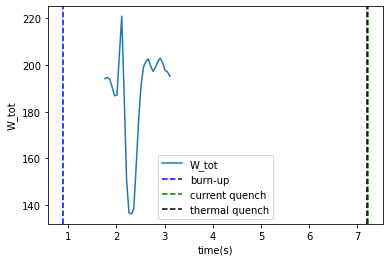

In [74]:
plt.plot(t[28:56], W_tot[28:56], label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

In [20]:
ts_te_core_cols = df_shot.columns.tolist()[18:32]
ts_te_edge_cols = df_shot.columns.tolist()[32:44]
ts_ne_core_cols = df_shot.columns.tolist()[44:58]
ts_ne_edge_cols = df_shot.columns.tolist()[58:68]

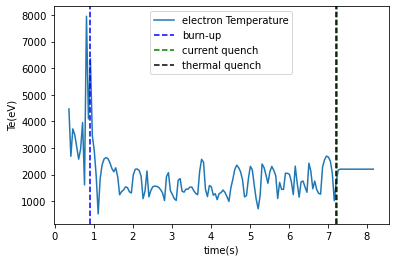

In [21]:
te_core = df_shot[ts_te_core_cols[-1]]
plt.plot(t, te_core, label = 'electron Temperature')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('Te(eV)')
plt.legend()
plt.show()

In [167]:
import numpy as np
import torch
import torch.nn as nn

df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()

# nan interpolation
df.interpolate(method = 'linear', limit_direction = 'forward')

# columns for use
ts_cols = [
    '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', '\\WTOT_DLM03'
]

# float type
for col in ts_cols:
    df[col] = df[col].astype(np.float32)

# train / valid / test data split
from sklearn.model_selection import train_test_split
shot_list = np.unique(df.shot.values)

shot_train, shot_test = train_test_split(shot_list, test_size = 0.2, random_state = 42)
shot_train, shot_valid = train_test_split(shot_train, test_size = 0.2, random_state = 42)

df_train = pd.DataFrame()
df_valid = pd.DataFrame()
df_test = pd.DataFrame()

for shot in shot_train:
    df_train = pd.concat([df_train, df[df.shot == shot]], axis = 0)

for shot in shot_valid:
    df_valid = pd.concat([df_valid, df[df.shot == shot]], axis = 0)

for shot in shot_test:
    df_test = pd.concat([df_test, df[df.shot == shot]], axis = 0)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
scaler = RobustScaler()
df_train[ts_cols] = scaler.fit_transform(df_train[ts_cols].values)
df_valid[ts_cols] = scaler.transform(df_valid[ts_cols].values)
df_test[ts_cols] = scaler.transform(df_test[ts_cols].values)

# disruption info
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List_extend.csv', encoding = "euc-kr")

# shot list
shot_list = np.unique(df.shot.values).tolist()

from typing import Optional, List
from tqdm.auto import tqdm

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, ts_data : pd.DataFrame, disrupt_data : pd.DataFrame, seq_len : int, cols : List, dist:int, dt : float):
        self.ts_data = ts_data
        self.disrupt_data = disrupt_data
        self.seq_len = seq_len
        self.dt = dt
        self.cols = cols
        self.dist = dist # distance

        self.indices = []
        self.labels = []
        self.n_classes = 2
        self._generate_index()

    def _generate_index(self):
        shot_list = np.unique(self.ts_data.shot.values).tolist()
        df_disruption = self.disrupt_data

        for shot in tqdm(shot_list):
            tTQend = df_disruption[df_disruption.shot == shot].tTQend.values[0]
            tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values[0]
            tipminf = df_disruption[df_disruption.shot == shot].tipminf.values[0]

            t_disrupt = tipminf

            df_shot = self.ts_data[self.ts_data.shot == shot]
            indices = []
            labels = []

            idx = int(tftsrt * self.dt)
            idx_last = len(df_shot.index) - self.seq_len - self.dist

            while(idx < idx_last):
                row = df_shot.iloc[idx]
                t = row['time']

                if idx_last - idx - self.seq_len - self.dist < 0:
                    break

                if t >= tftsrt and t < t_disrupt - self.dt * (self.seq_len + self.dist):
                    indx = df_shot.index.values[idx]
                    indices.append(indx)
                    labels.append(0)
                    idx += self.seq_len

                elif t > t_disrupt - self.dt * (self.seq_len + self.dist) and t <= t_disrupt:
                    indx = df_shot.index.values[idx]
                    indices.append(indx)
                    labels.append(1)
                    idx += self.seq_len
                
                elif t < tftsrt:
                    idx += self.seq_len
                
                elif t > t_disrupt:
                    break

            self.indices.extend(indices)
            self.labels.extend(labels)

    def __getitem__(self, idx:int):
        indx = self.indices[idx]
        label = self.labels[idx]
        label = np.array(label)
        label = torch.from_numpy(label)
        data = self.ts_data[self.cols].loc[indx:indx+self.seq_len - 1].values
        data = torch.from_numpy(data).float()
        return data, label

    def __len__(self):
        return len(self.indices)

    def get_num_per_cls(self):
        classes = np.unique(self.labels)
        self.num_per_cls_dict = dict()

        for cls in classes:
            num = np.sum(np.where(self.labels == cls, 1, 0))
            self.num_per_cls_dict[cls] = num
         
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.n_classes):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

from sklearn.model_selection import train_test_split
ts_train = df_train
ts_valid = df_valid
ts_test = df_test
seq_len = 21
cols = ts_cols

train_data = CustomDataset(ts_train, kstar_shot_list, seq_len = seq_len, cols = ts_cols, dist = 0, dt = 1.0 / 210 * 4)
valid_data = CustomDataset(ts_valid, kstar_shot_list, seq_len = seq_len, cols = ts_cols, dist = 0, dt = 1.0 / 210 * 4)
test_data = CustomDataset(ts_test, kstar_shot_list, seq_len = seq_len, cols = ts_cols, dist = 0, dt = 1.0 / 210 * 4)

from torch.utils.data import DataLoader
from src.utils.sampler import ImbalancedDatasetSampler

batch_size = 128
sampler = ImbalancedDatasetSampler(train_data)
train_loader = DataLoader(train_data, batch_size = batch_size, num_workers = 4, sampler = sampler)
valid_loader = DataLoader(valid_data, batch_size = batch_size, num_workers = 4, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, num_workers = 4, shuffle = True)

sample_data, sample_target = next(iter(train_loader))
print("sample_data : ", sample_data.size())
print("sample_target : ", sample_target.size())

100%|██████████| 17/17 [00:00<00:00, 239.56it/s]


sample_data :  torch.Size([128, 21, 9])
sample_target :  torch.Size([128])


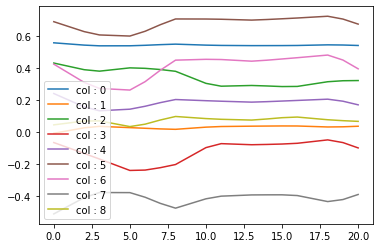

In [168]:
import matplotlib.pyplot as plt
plt.plot(sample_data[0,:,0].numpy(), label = 'col : 0')
plt.plot(sample_data[0,:,1].numpy(), label = 'col : 1')
plt.plot(sample_data[0,:,2].numpy(), label = 'col : 2')
plt.plot(sample_data[0,:,3].numpy(), label = 'col : 3')
plt.plot(sample_data[0,:,4].numpy(), label = 'col : 4')
plt.plot(sample_data[0,:,5].numpy(), label = 'col : 5')
plt.plot(sample_data[0,:,6].numpy(), label = 'col : 6')
plt.plot(sample_data[0,:,7].numpy(), label = 'col : 7')
plt.plot(sample_data[0,:,8].numpy(), label = 'col : 8')
plt.legend()
plt.show()

disruptive :  51
non-disruptive :  1345


/home/jinsukim/miniconda3/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


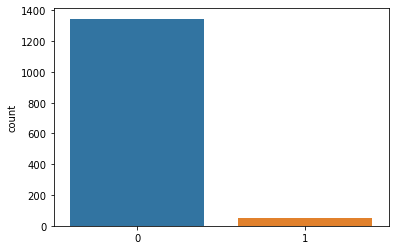

In [128]:
import seaborn as sns
sns.countplot(train_data.labels)
print("disruptive : ", np.sum(train_data.labels))
print("non-disruptive : ", len(train_data.labels) - np.sum(train_data.labels))

In [170]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
from torch.nn import functional as F
from typing import List, Optional, Union, Tuple

class ConvLSTM(nn.Module):
    def __init__(
        self, 
        seq_len : int = 21, 
        col_dim : int = 10, 
        conv_dim : int = 32, 
        conv_kernel : int = 3,
        conv_stride : int = 1, 
        conv_padding : int = 1,
        lstm_dim : int = 64, 
        n_classes : int = 2, 
        mlp_dim : int = 64,
        ):
        
        super(ConvLSTM, self).__init__()
        self.col_dim = col_dim
        self.seq_len = seq_len
        self.lstm_dim = lstm_dim

        # spatio-conv encoder : analyze spatio-effect between variables
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels = col_dim, out_channels = conv_dim, kernel_size = conv_kernel, stride = conv_stride, padding = conv_padding),
            nn.BatchNorm1d(conv_dim), 
            nn.ReLU(),
            nn.Conv1d(in_channels = conv_dim, out_channels = conv_dim, kernel_size = conv_kernel, stride = conv_stride, padding = conv_padding),
            nn.BatchNorm1d(conv_dim), 
            nn.ReLU(),
        )

        lstm_input_dim = self.compute_conv1d_output_dim(self.compute_conv1d_output_dim(seq_len, conv_kernel, conv_stride, conv_padding, 1), conv_kernel, conv_stride, conv_padding, 1)

        # temporl - lstm
        self.lstm = nn.LSTM(lstm_input_dim, lstm_dim, bidirectional = True, batch_first = False)
        self.w_s1 = nn.Linear(lstm_dim * 2, lstm_dim)
        self.w_s2 = nn.Linear(lstm_dim, lstm_dim)

        self.classifier = nn.Sequential(
            nn.Linear(lstm_dim * 2, mlp_dim),
            nn.BatchNorm1d(mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, mlp_dim),
            nn.BatchNorm1d(mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, n_classes)
        )
    
    def compute_conv1d_output_dim(self, input_dim : int, kernel_size : int = 3, stride : int = 1, padding : int = 1, dilation : int = 1):
        return int((input_dim + 2 * padding - dilation * (kernel_size - 1) - 1) / stride + 1)

    def attention(self, lstm_output : torch.Tensor)->torch.Tensor:
        attn_weight_matrix = self.w_s2(torch.tanh(self.w_s1(lstm_output)))
        attn_weight_matrix = F.softmax(attn_weight_matrix, dim = 2)
        return attn_weight_matrix

    def forward(self, x : torch.Tensor)->torch.Tensor:
        # x : (batch, seq_len, col_dim)
        x_conv = self.conv(x.permute(0,2,1))
        h_0 = Variable(torch.zeros(2, x.size()[0], self.lstm_dim)).to(x.device)
        c_0 = Variable(torch.zeros(2, x.size()[0], self.lstm_dim)).to(x.device)

        lstm_output, (h_n,c_n) = self.lstm(x_conv.permute(1,0,2), (h_0, c_0))
        lstm_output = lstm_output.permute(1,0,2)
        att = self.attention(lstm_output)
        hidden = torch.bmm(att.permute(0,2,1), lstm_output).mean(dim = 1)
        hidden = hidden.view(hidden.size()[0], -1)
        output = self.classifier(hidden)
        return output

seq_len = seq_len
col_len = len(cols)
batch_size = batch_size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ConvLSTM(
    seq_len = seq_len,
    col_dim = col_len,
)

import torch
import torch.nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def train_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    max_norm_grad : Optional[float] = None
    ):

    model.train()
    model.to(device)

    train_loss = 0
    train_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()

        # use gradient clipping
        if max_norm_grad:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm_grad)

        optimizer.step()

        train_loss += loss.item()

        pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
        train_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
    
        total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
        total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))
        
    if scheduler:
        scheduler.step()

    train_loss /= (batch_idx + 1)
    train_acc /= (batch_idx + 1)

    train_f1 = f1_score(total_label, total_pred, average = "macro")

    return train_loss, train_acc, train_f1

def valid_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    ):

    model.eval()
    model.to(device)

    valid_loss = 0
    valid_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        with torch.no_grad():
            optimizer.zero_grad()
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            valid_loss += loss.item()

            pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
            valid_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
        
            total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
            total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))

    valid_loss /= (batch_idx + 1)
    valid_acc /= (batch_idx + 1)

    valid_f1 = f1_score(total_label, total_pred, average = "macro")

    return valid_loss, valid_acc, valid_f1


def train(
    train_loader : torch.utils.data.DataLoader, 
    valid_loader : Optional[torch.utils.data.DataLoader],
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn = None,
    device : str = "cpu",
    num_epoch : int = 64,
    verbose : Optional[int] = 8,
    save_best_dir : str = "./weights/best.pt",
    save_last_dir : str = "./weights/last.pt",
    max_norm_grad : Optional[float] = None,
    criteria : str = "f1_score"
    ):

    train_loss_list = []
    valid_loss_list = []
    
    train_acc_list = []
    valid_acc_list = []

    train_f1_list = []
    valid_f1_list = []

    best_acc = 0
    best_epoch = 0
    best_f1 = 0
    best_loss = torch.inf

    if loss_fn is None:
        loss_fn = torch.nn.CrossEntropyLoss(reduction = 'mean')

    for epoch in tqdm(range(num_epoch), desc = "training process"):

        # training
        train_loss, train_acc, train_f1 = train_per_epoch(
            train_loader, 
            model,
            optimizer,
            scheduler,
            loss_fn,
            device,
            max_norm_grad
        )

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)

        # validation
        valid_loss, valid_acc, valid_f1 = valid_per_epoch(
            valid_loader, 
            model,
            optimizer,
            loss_fn,
            device 
        )
        
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        valid_f1_list.append(valid_f1)

        if verbose:
            if epoch % verbose == 0:
                print("epoch : {}, train loss : {:.3f}, valid loss : {:.3f}, train acc : {:.3f}, valid acc : {:.3f}, train f1 : {:.3f}, valid f1 : {:.3f}".format(
                    epoch+1, train_loss, valid_loss, train_acc, valid_acc, train_f1, valid_f1
                ))

        # save the best parameters
        if criteria == "acc" and best_acc < valid_acc:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        elif criteria == "f1_score" and best_f1 < valid_f1:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        elif criteria == "loss" and best_loss > valid_loss:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        # save the last parameters
        torch.save(model.state_dict(), save_last_dir)

    print("training process finished, best loss : {:.3f} and best acc : {:.3f}, best f1 : {:.3f}, best epoch : {}".format(
        best_loss, best_acc, best_f1, best_epoch
    ))

    return  train_loss_list, train_acc_list, train_f1_list,  valid_loss_list,  valid_acc_list, valid_f1_list


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 1e-3

from src.loss import FocalLoss
train_data.get_num_per_cls()
cls_num_list = train_data.get_cls_num_list()
per_cls_weights = 1.0 / np.array(cls_num_list)
per_cls_weights = per_cls_weights / np.sum(per_cls_weights)
per_cls_weights = torch.FloatTensor(per_cls_weights)
loss_fn = FocalLoss(per_cls_weights, gamma = 2)

num_epoch = 64
verbose = 8
save_best_dir = "./weights/ts_conv_lstm_best.pt"
save_last_dir = "./weights/ts_conv_lstm_last.pt"
max_norm_grad = 1.0
criteria = "f1_score"
optimizer = torch.optim.AdamW(model.parameters(), lr = lr)

model.to(device)

train_loss, train_acc, train_f1, valid_loss, valid_acc, valid_f1 = train(
    train_loader,
    valid_loader,
    model,
    optimizer,
    None,
    loss_fn,
    device,
    num_epoch,
    verbose,
    save_best_dir,
    save_last_dir,
    max_norm_grad,
    criteria
)

training process:   2%|▏         | 1/64 [00:01<01:44,  1.66s/it]

epoch : 1, train loss : 4.496, valid loss : 1.151, train acc : 0.856, valid acc : 0.025, train f1 : 0.856, valid f1 : 0.032


training process:  14%|█▍        | 9/64 [00:13<01:25,  1.55s/it]

epoch : 9, train loss : 0.007, valid loss : 1.017, train acc : 1.000, valid acc : 0.859, train f1 : 1.000, valid f1 : 0.564


training process:  27%|██▋       | 17/64 [00:26<01:12,  1.55s/it]

epoch : 17, train loss : 0.002, valid loss : 1.140, train acc : 1.000, valid acc : 0.994, train f1 : 1.000, valid f1 : 0.933


training process:  39%|███▉      | 25/64 [00:38<01:00,  1.54s/it]

epoch : 25, train loss : 0.001, valid loss : 2.109, train acc : 0.999, valid acc : 0.990, train f1 : 0.999, valid f1 : 0.878


training process:  52%|█████▏    | 33/64 [00:50<00:46,  1.50s/it]

epoch : 33, train loss : 0.011, valid loss : 0.940, train acc : 0.997, valid acc : 0.990, train f1 : 0.997, valid f1 : 0.897


training process:  64%|██████▍   | 41/64 [01:02<00:35,  1.54s/it]

epoch : 41, train loss : 0.000, valid loss : 1.221, train acc : 1.000, valid acc : 0.994, train f1 : 1.000, valid f1 : 0.933


training process:  77%|███████▋  | 49/64 [01:14<00:22,  1.52s/it]

epoch : 49, train loss : 0.000, valid loss : 1.144, train acc : 1.000, valid acc : 0.892, train f1 : 1.000, valid f1 : 0.881


training process:  89%|████████▉ | 57/64 [01:27<00:10,  1.48s/it]

epoch : 57, train loss : 0.000, valid loss : 0.625, train acc : 1.000, valid acc : 0.994, train f1 : 1.000, valid f1 : 0.942


training process: 100%|██████████| 64/64 [01:38<00:00,  1.53s/it]

training process finished, best loss : 0.801 and best acc : 0.998, best f1 : 0.979, best epoch : 60


In [171]:
from typing import Optional, List, Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
from pytorch_model_summary import summary

class PositionalEncoding(nn.Module):
    def __init__(self, d_model : int, max_len : int = 128):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len

        pe = torch.zeros(max_len, d_model).float()
        position = torch.arange(0, max_len).float().unsqueeze(1) # (max_len, 1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp() # (d_model // 2, )

        pe[:,0::2] = torch.sin(position * div_term)

        if d_model % 2 != 0:
            pe[:,1::2] = torch.cos(position * div_term)[:,0:-1]
        else:
            pe[:,1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0).transpose(0,1) # shape : (max_len, 1, d_model)

        self.register_buffer('pe', pe)

    def forward(self, x:torch.Tensor)->torch.Tensor:
        # x : (seq_len, batch_size, n_features)
        return x + self.pe[:x.size(0), :, :]

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

class TStransformer(nn.Module):
    def __init__(self, n_features : int = 11, feature_dims : int = 256, max_len : int = 128, n_layers : int = 1, n_heads : int = 8, dim_feedforward : int = 1024, dropout : float = 0.1, cls_dims : int = 128, n_classes : int = 2):
        super(TStransformer, self).__init__()
        self.src_mask = None
        self.n_features = n_features
        self.max_len = max_len
        self.encoder_input_layer = nn.Linear(in_features = n_features, out_features = feature_dims)
        self.pos_enc = PositionalEncoding(d_model = feature_dims, max_len = max_len)
        self.encoder = nn.TransformerEncoderLayer(
            d_model = feature_dims, 
            nhead = n_heads, 
            dropout = dropout,
            dim_feedforward = dim_feedforward,
            activation = GELU()
        )
        self.transformer_encoder = nn.TransformerEncoder(self.encoder, num_layers=n_layers)
        self.classifier = nn.Sequential(
            nn.Linear(feature_dims, cls_dims),
            nn.BatchNorm1d(cls_dims),
            GELU(),
            nn.Linear(cls_dims, n_classes)
        )


    def forward(self, x : torch.Tensor)->torch.Tensor:
        x = self.encoder_input_layer(x)
        x = x.permute(1,0,2)
        if self.src_mask is None or self.src_mask.size(0) != len(x):
            device = x.device
            mask = self._generate_square_subsequent_mask(len(x)).to(device)
            self.src_mask = mask
        
        x = self.pos_enc(x)
        x = self.transformer_encoder(x, self.src_mask.to(x.device)).permute(1,0,2).mean(dim = 1) # (seq_len, batch, feature_dims)
        x = self.classifier(x)
        return x

    def _generate_square_subsequent_mask(self, size : int)->torch.Tensor:
        mask = (torch.triu(torch.ones(size,size))==1).transpose(0,1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def summary(self)->None:
        sample_x = torch.zeros((2, self.max_len, self.n_features))
        summary(self, sample_x, batch_size = 2, show_input = True, print_summary=True)

model = TStransformer(
    n_features=len(ts_cols),
    feature_dims = 16,
    max_len = seq_len, 
    n_layers = 4,
    n_heads = 4, 
    dim_feedforward = 1024,
    dropout = 0.5, 
    cls_dims = 128, 
    n_classes  = 2
)

model.summary()

----------------------------------------------------------------------------------
           Layer (type)               Input Shape         Param #     Tr. Param #
               Linear-1                [2, 21, 9]             160             160
   PositionalEncoding-2               [21, 2, 16]               0               0
   TransformerEncoder-3     [21, 2, 16], [21, 21]         139,840         139,840
               Linear-4                   [2, 16]           2,176           2,176
          BatchNorm1d-5                  [2, 128]             256             256
                 GELU-6                  [2, 128]               0               0
               Linear-7                  [2, 128]             258             258
Total params: 142,690
Trainable params: 142,690
Non-trainable params: 0
Batch size: 2
----------------------------------------------------------------------------------


In [172]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 1e-3
loss_fn = FocalLoss(per_cls_weights, gamma = 2)
num_epoch = 64
verbose = 8
save_best_dir = "./weights/ts_transformer_best.pt"
save_last_dir = "./weights/ts_transformer_last.pt"
max_norm_grad = 1.0
criteria = "f1_score"
optimizer = torch.optim.AdamW(model.parameters(), lr = lr)

model.to(device)

train_loss, train_acc, train_f1, valid_loss, valid_acc, valid_f1 = train(
    train_loader,
    valid_loader,
    model,
    optimizer,
    None,
    loss_fn,
    device,
    num_epoch,
    verbose,
    save_best_dir,
    save_last_dir,
    max_norm_grad,
    criteria
)

training process:   2%|▏         | 1/64 [00:01<01:58,  1.87s/it]

epoch : 1, train loss : 9.407, valid loss : 1.140, train acc : 0.698, valid acc : 0.584, train f1 : 0.697, valid f1 : 0.425


training process:  14%|█▍        | 9/64 [00:16<01:38,  1.79s/it]

epoch : 9, train loss : 0.887, valid loss : 1.617, train acc : 0.901, valid acc : 0.975, train f1 : 0.901, valid f1 : 0.767


training process:  27%|██▋       | 17/64 [00:29<01:20,  1.71s/it]

epoch : 17, train loss : 0.224, valid loss : 3.459, train acc : 0.977, valid acc : 0.986, train f1 : 0.977, valid f1 : 0.811


training process:  39%|███▉      | 25/64 [00:43<01:07,  1.72s/it]

epoch : 25, train loss : 0.149, valid loss : 3.163, train acc : 0.977, valid acc : 0.992, train f1 : 0.977, valid f1 : 0.914


training process:  52%|█████▏    | 33/64 [00:56<00:51,  1.67s/it]

epoch : 33, train loss : 0.137, valid loss : 6.000, train acc : 0.991, valid acc : 0.994, train f1 : 0.991, valid f1 : 0.933


training process:  64%|██████▍   | 41/64 [01:10<00:39,  1.74s/it]

epoch : 41, train loss : 0.170, valid loss : 9.022, train acc : 0.990, valid acc : 0.988, train f1 : 0.990, valid f1 : 0.846


training process:  77%|███████▋  | 49/64 [01:24<00:26,  1.79s/it]

epoch : 49, train loss : 0.202, valid loss : 8.505, train acc : 0.994, valid acc : 0.992, train f1 : 0.994, valid f1 : 0.906


training process:  89%|████████▉ | 57/64 [01:38<00:12,  1.72s/it]

epoch : 57, train loss : 0.028, valid loss : 8.156, train acc : 0.997, valid acc : 0.990, train f1 : 0.997, valid f1 : 0.878


training process: 100%|██████████| 64/64 [01:49<00:00,  1.72s/it]

training process finished, best loss : 6.000 and best acc : 0.994, best f1 : 0.933, best epoch : 32
